In [1381]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


### Loading data from file to dataframe and glancing at it.

In [1382]:
boombikes = pd.read_csv('day.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1383]:
boombikes.shape

(730, 16)

In [1384]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Categorical Variables
    
    1. season
    2. yr
    3. month
    4. holiday
    5. weekday
    6. workingday
    7. weathersit

#### Numerical Variables

    1. temp
    2. atemp
    3. hum
    4. windspeed
    5. casual
    6. registered

In [1385]:
# Checking for missing values
boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No missing values in the dataset.

In [1386]:
# Let's descibe the dataset and see the distribution of the numerical columns.
boombikes.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [1387]:
# Rename columns to give them more readable names

boombikes.rename(columns={'yr':'year', 'mnth':'month', 'weathersit':'weather', 'hum':'humidity', 'cnt':'count'}, inplace=True)
boombikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1388]:
# Let's drop unnecessary columns from the dataframe.

# Column `instant` is just an index column. We can drop it.
# Column `dteday` is not required as we have `year` and `month` columns. We can drop it.
# Column `casual` and `registered` are not required as we have `count` column which is a sum these two columns.
# Also `count` is the target variable and has high correlation with them. We can drop these two columns.

boombikes = boombikes.drop(['instant','dteday','casual','registered'], axis=1)
boombikes.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Let's first analyze impact of categorical variables on the demand of bikes.

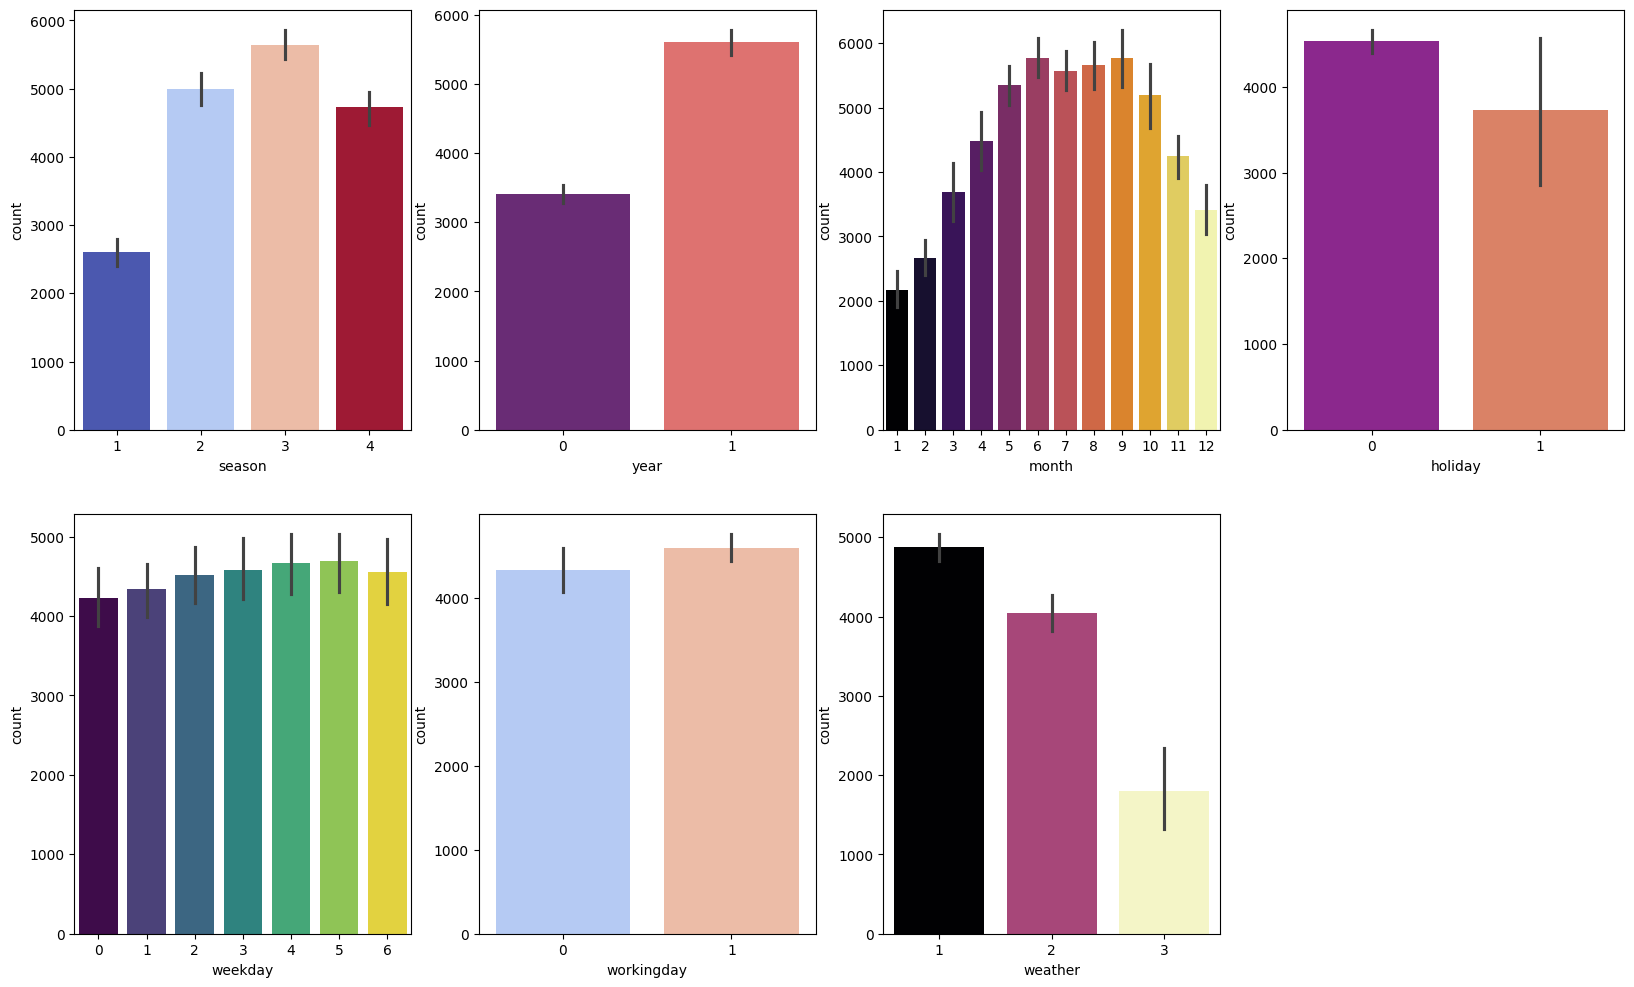

In [1389]:
# Ploting the distribution of the target variable 'count' against multiple categorical variables 
# to understand the impact of these variables on the demand of bikes.

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'count', data = boombikes, palette = 'coolwarm', hue='season', legend=False)
plt.subplot(2,4,2)
sns.barplot(x = 'year', y = 'count', data = boombikes, palette = 'magma', hue='year', legend=False)
plt.subplot(2,4,3)
sns.barplot(x = 'month', y = 'count', data = boombikes, palette = 'inferno', hue='month', legend=False)
plt.subplot(2,4,4)
sns.barplot(x = 'holiday', y = 'count', data = boombikes, palette = 'plasma', hue='holiday', legend=False)
plt.subplot(2,4,5)
sns.barplot(x = 'weekday', y = 'count', data = boombikes, palette = 'viridis', hue='weekday', legend=False)
plt.subplot(2,4,6)
sns.barplot(x = 'workingday', y = 'count', data = boombikes, palette = 'coolwarm', hue='workingday', legend=False)
plt.subplot(2,4,7)
sns.barplot(x = 'weather', y = 'count', data = boombikes, palette = 'magma', hue='weather', legend=False)

plt.show()

### Observation:
Following observations can be made from above charts.

1. Summer and fall have the highest demand for bikes. It is also surprising to see more bikes are rented in winter compared to spring.
2. This is mirrored in demand trend of bikes during months from May to December.
2. Year 2019 has more demand for bikes than 2018.
3. Bikes are in less demand during holidays and non-working days. But the difference in demand not significant.
4. Demand for bikes is highest on clear and/or cloudy days and lowest on rainy days.
5. Demand for bikes accross the weeke does not change at a big extent.

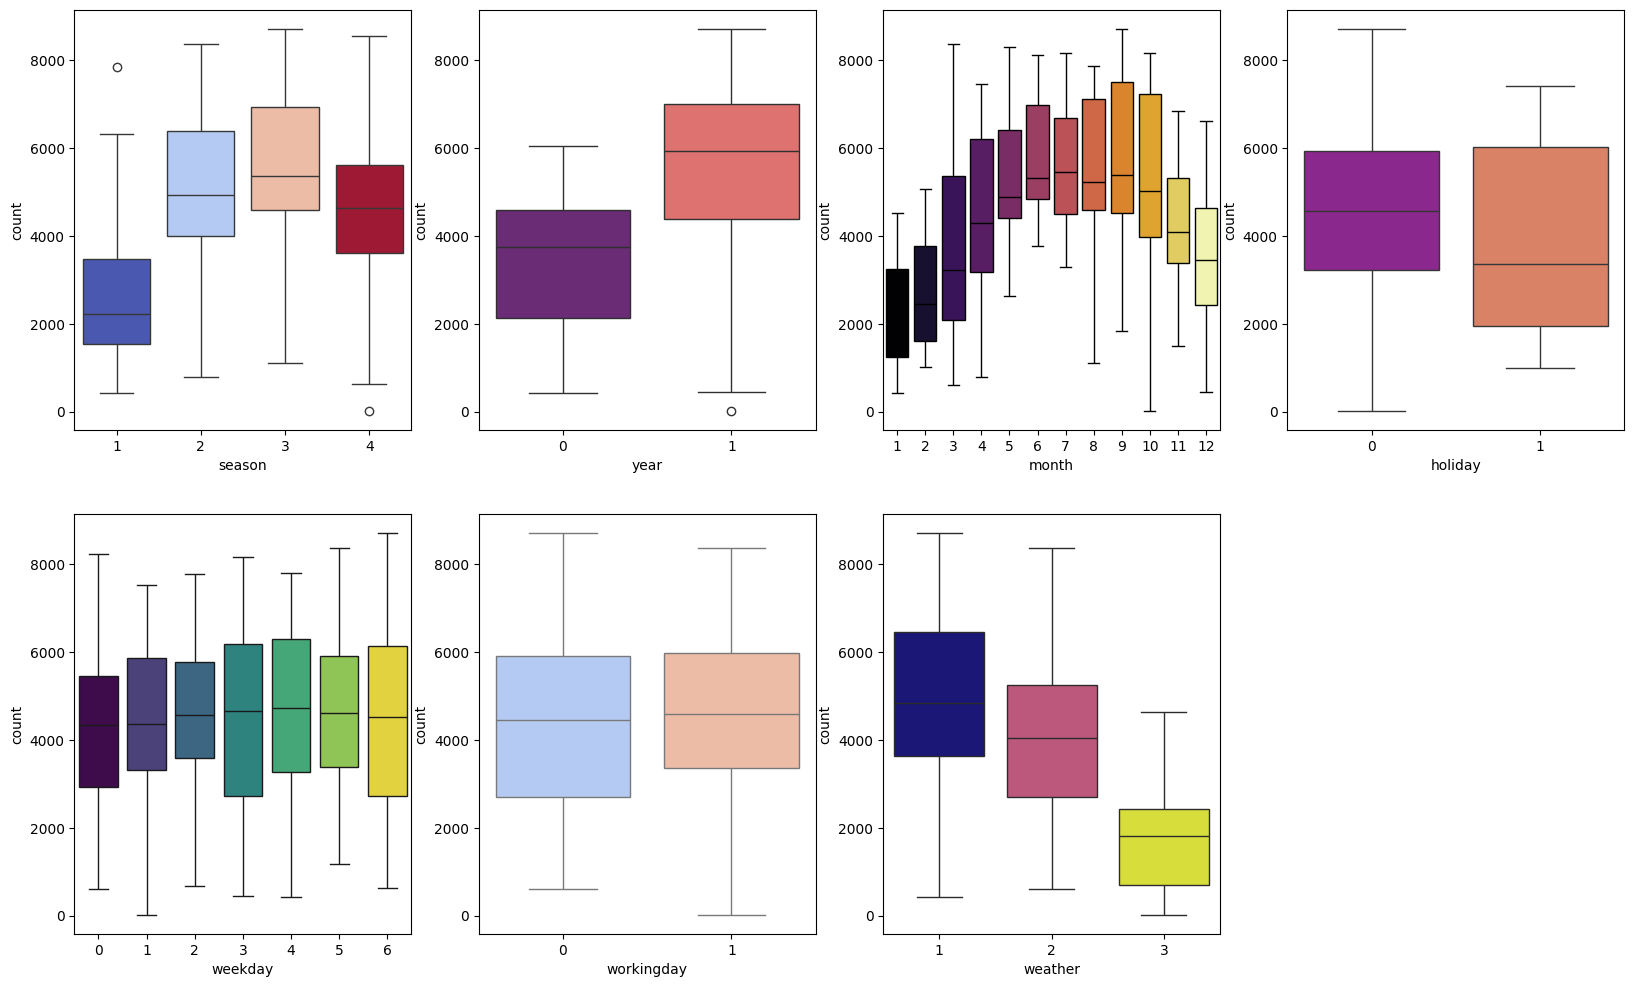

In [1390]:
# Ploting the distribution of the target variable 'count' against multiple categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = boombikes, palette = 'coolwarm', hue='season', legend=False)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'count', data = boombikes, palette = 'magma', hue='year', legend=False)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = boombikes, palette = 'inferno', hue='month', legend=False)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = boombikes, palette = 'plasma', hue='holiday', legend=False)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = boombikes, palette = 'viridis', hue='weekday', legend=False)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = boombikes, palette = 'coolwarm', hue='workingday', legend=False)
plt.subplot(2,4,7)
sns.boxplot(x = 'weather', y = 'count', data = boombikes, palette = 'plasma', hue='weather', legend=False)

plt.show()

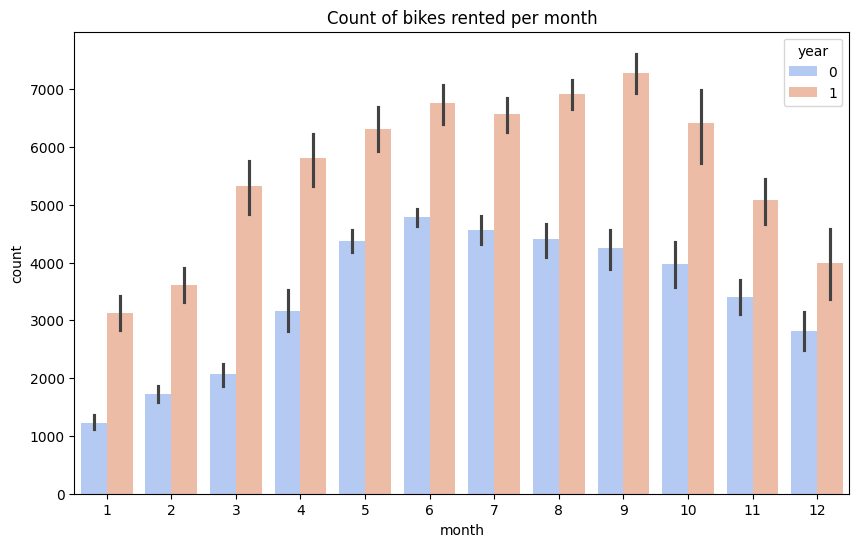

In [1391]:
# Ploting the distribution of the target variable 'count' against month and year
plt.figure(figsize=(10, 6))
plt.title('Count of bikes rented per month')
sns.barplot(x = 'month', y = 'count', data = boombikes, palette = 'coolwarm', hue='year')
plt.show()

Observations:

1. Year 2019 has higher demand of bikes than the year 2018.
2. Bikes are in more demand during months from May to October during 2019.

## Let's now analyze impact of numerical variables on the target variable.

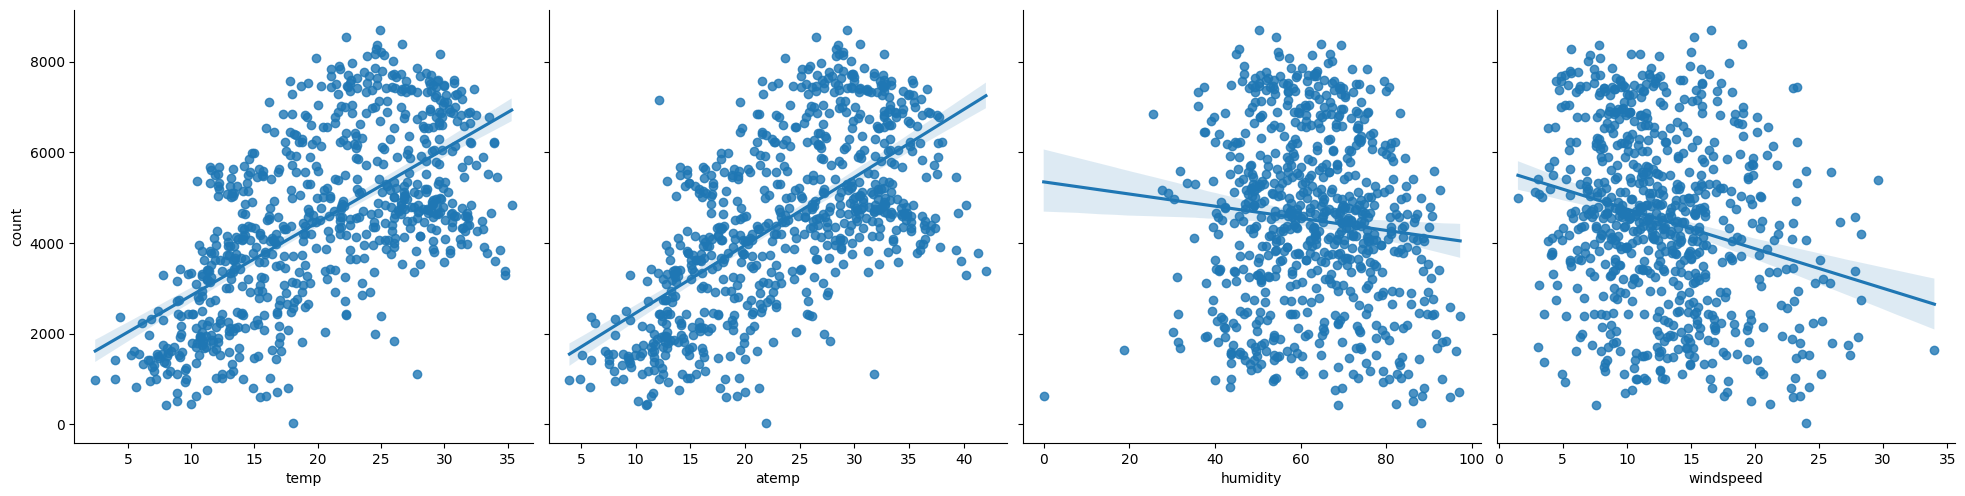

In [1392]:
# Ploting the distribution of the target variable 'count' against multiple numerical variables 
# to understand the impact of these variables on the demand of bikes.

sns.pairplot(boombikes, x_vars=['temp', 'atemp', 'humidity', 'windspeed'], y_vars='count', height=5, aspect=1, kind='reg', palette='viridis')
plt.show()

### Observation:
Following observations can be made from above charts.

1. Demand for bike increases as the temperature increases. People avoid to use bike during colder weather.
2. Demand for bike is more when windspeed is less.

## Let's see the correlation between variables in the dataset.

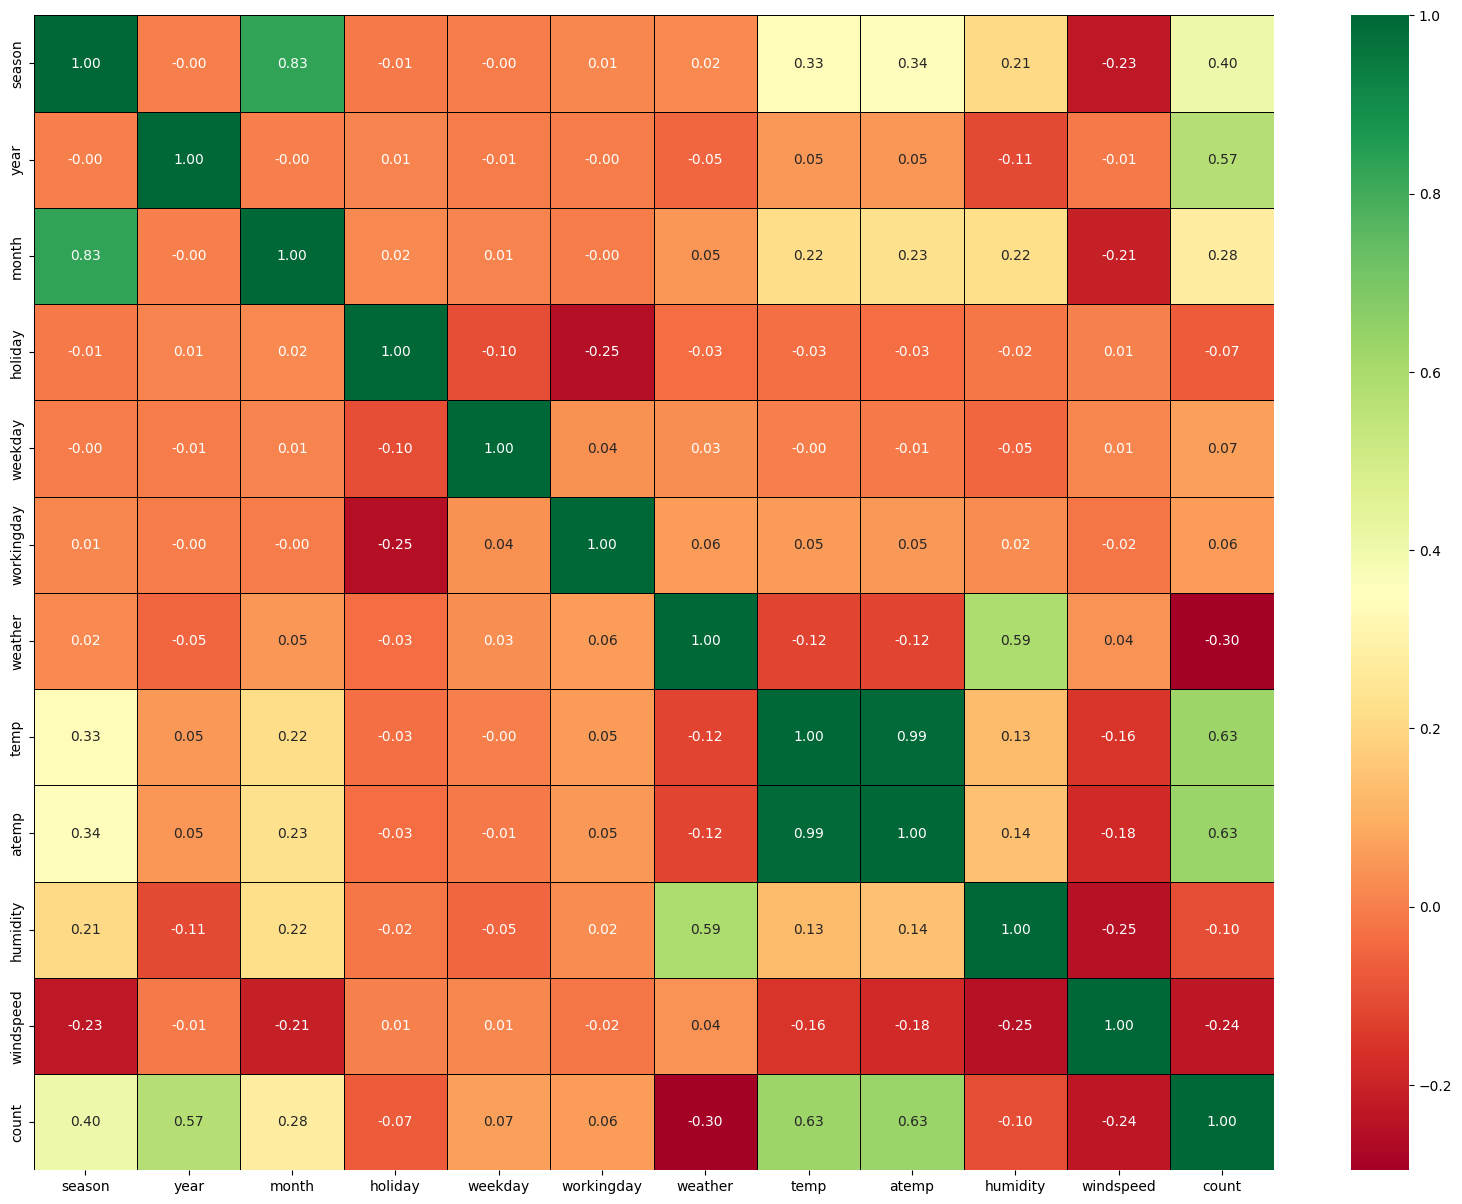

In [1393]:
# Plotting a heatman to understand the correlation between the numerical variables.

numric_var = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

plt.figure(figsize=(20, 15))
sns.heatmap(boombikes.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, linecolor='black')
plt.show()

### Observations:
Following observations can be made from above charts.

1. temp and atemp are highly correlated and they have the same correlation with the bikes demand.
2. Windspeed and humidy have negative impact on the demands of bikes.
3. While windspeed is negatively correlated with temp, humidity is positively correlated with temp.
4. Bike demand tend to increase with higher temperature and decrease as windspeed increase as it is observed in earlier plots.

In summary, temp, atemp, season, year, humidity and windspeed are correlated to 'count' variable. Also other variables are correlated. With the help of above graph and interpration we can idenfity the variables which can be usefull in building the model.

Hence, we can consider using Linear Regression Model in this case.

In [1394]:
# temp and atemp are highly correlated, so we can drop one of the variable.
# Dropping the variable 'atemp'.
boombikes = boombikes.drop(['atemp'], axis=1)

#### Creating dummy variables.

In [1395]:
# Creating dummy variables for month.
Months = pd.get_dummies(boombikes['month'], dtype=int, drop_first=True)
Months.rename(columns={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 
                      6:'Jun', 7:'Jul',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
Months.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [1396]:
boombikes = pd.concat([boombikes, Months], axis=1)
boombikes.head()

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [1397]:
# Dropping 'month' column as dummy variables are created for the same.
boombikes = boombikes.drop('month', axis=1)

In [1398]:
# Creating dummy variables for season.

Seasons = pd.get_dummies(boombikes['season'], dtype=int, drop_first=True)
Seasons.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
Seasons.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [1399]:
boombikes = pd.concat([boombikes, Seasons], axis=1)

# Dropping 'season' column as dummy variables are created for the same.
boombikes = boombikes.drop('season', axis=1)

In [1400]:
# Creating dummy variables for weekday.

Weekdays = pd.get_dummies(boombikes['weekday'], dtype=int, drop_first=True)
Weekdays.rename(columns={0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)
Weekdays.head()

,Mon,Tue,Wed,Thu,Fri,Sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [1401]:
boombikes = pd.concat([boombikes, Weekdays], axis=1)

# Dropping 'weekday' column as dummy variables are created for the same.
boombikes = boombikes.drop('weekday', axis=1)

In [1402]:
boombikes.shape

(730, 28)

In [1403]:
# Creating dummy variables for weather.

Weather = pd.get_dummies(boombikes['weather'], dtype=int, drop_first=True)
Weather.rename(columns={1:'Clear', 2:'Mist', 3:'Light Rain', 4:'Heavy Rain'}, inplace=True)
Weather.head()

,Mist,Light Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [1404]:
boombikes = pd.concat([boombikes, Weather], axis=1)

# Dropping 'weather' column as dummy variables are created for the same.
boombikes = boombikes.drop('weather', axis=1)

boombikes.shape

(730, 29)

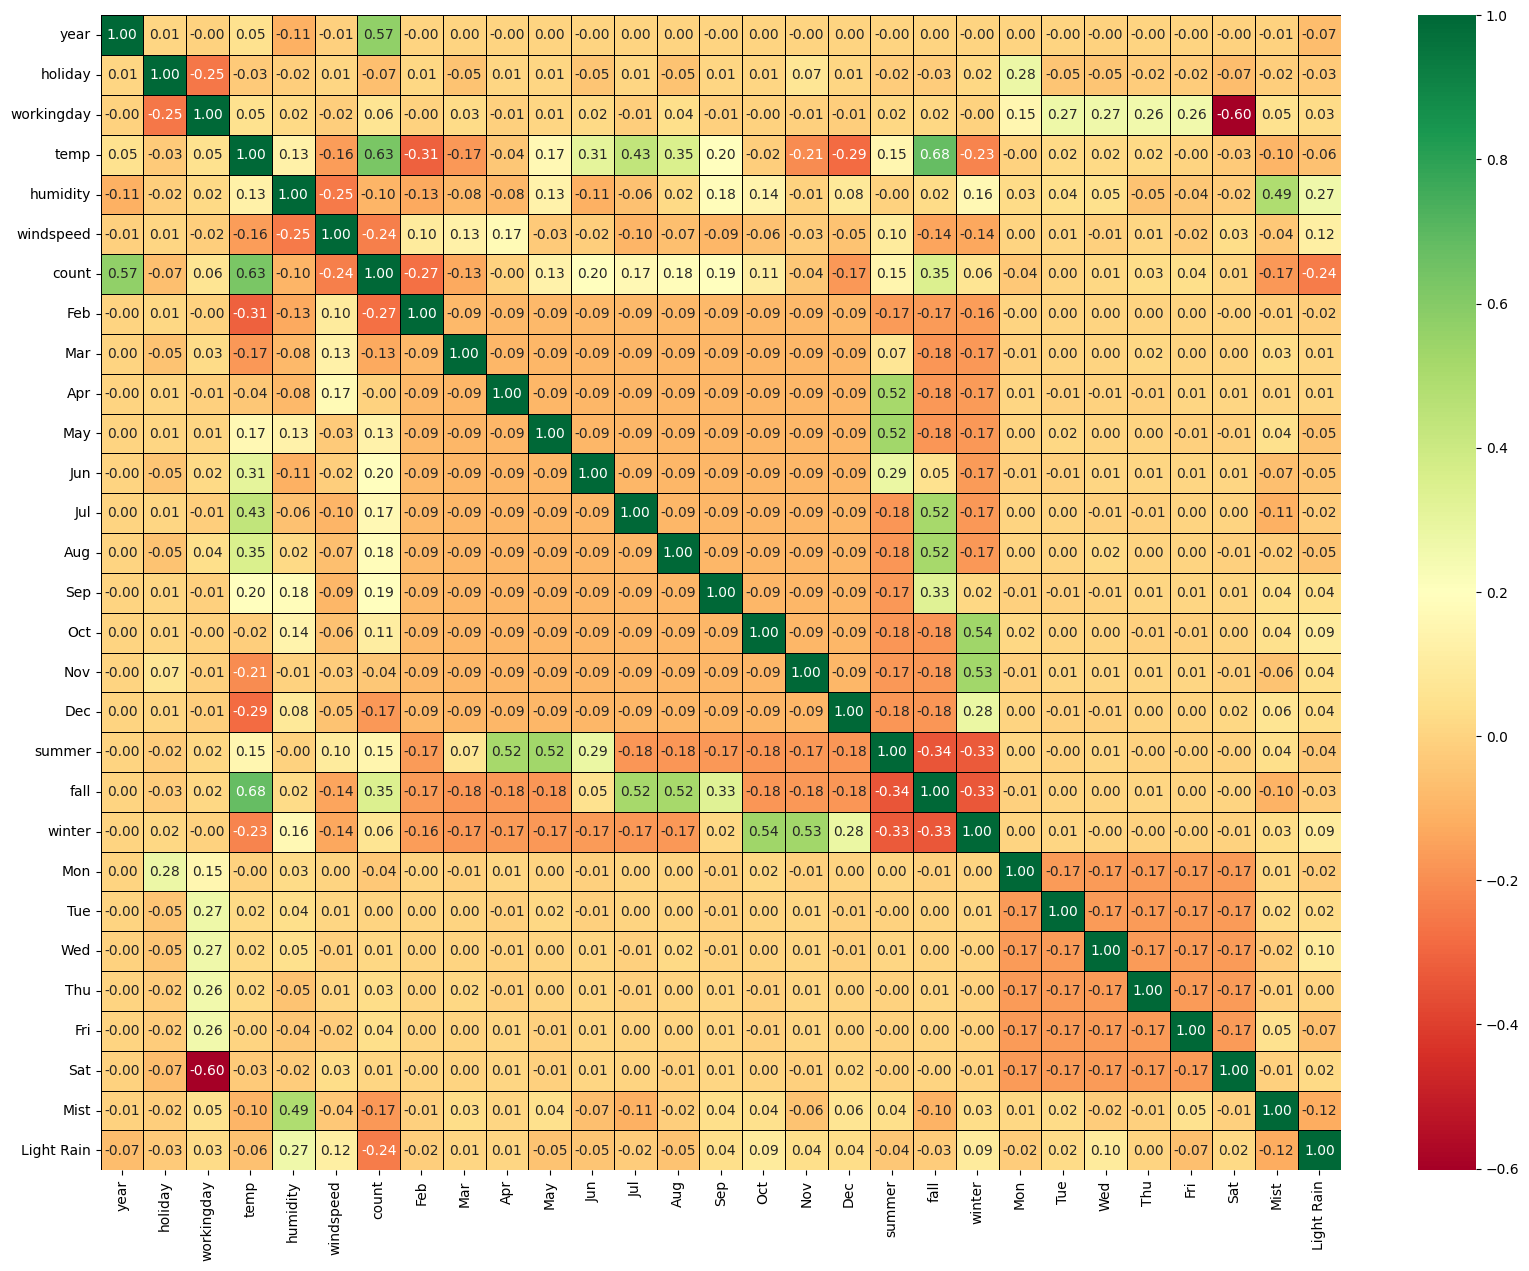

In [1405]:
# Let's check correlation between the variables one more time.

plt.figure(figsize=(20, 15))
sns.heatmap(boombikes.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, linecolor='black')
plt.show()

From the above chart, it is visible that Fall season, Summer season, temperature, May-Oct months, Clear weather have good influence on the demand of bikes.

### Splitting data into training and test sets.

In [1406]:
# importing other required modules

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [1407]:
df_train, df_test = train_test_split(boombikes, test_size=0.3, random_state=100)

print(df_train.shape)
print(df_test.shape)

(511, 29)
(219, 29)


Rescaling features.

In [1408]:
scaler = MinMaxScaler()

scaler_vars = ['temp', 'humidity', 'windspeed', 'count']

df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,511.0,0.508806,0.500412,0.0,0.000000,1.000000,1.000000,1.0
holiday,511.0,0.025440,0.157613,0.0,0.000000,0.000000,0.000000,1.0
workingday,511.0,0.677104,0.468042,0.0,0.000000,1.000000,1.000000,1.0
temp,511.0,0.537386,0.225640,0.0,0.341151,0.542077,0.735215,1.0
humidity,511.0,0.650333,0.145741,0.0,0.538858,0.653499,0.754401,1.0
windspeed,511.0,0.320844,0.169639,0.0,0.199179,0.298098,0.414438,1.0
count,511.0,0.514186,0.224737,0.0,0.356765,0.519673,0.688737,1.0
Feb,511.0,0.066536,0.249461,0.0,0.000000,0.000000,0.000000,1.0
Mar,511.0,0.097847,0.297399,0.0,0.000000,0.000000,0.000000,1.0
Apr,511.0,0.078278,0.268872,0.0,0.000000,0.000000,0.000000,1.0


In [1409]:
# Prepare the training data for modelling

y_train = df_train.pop('count')
X_train = df_train
print(X_train.shape)
print(y_train.shape)
print(y_train.sample(5))

(511, 28)
(511,)
250    0.209388
27     0.131730
373    0.270824
257    0.418431
417    0.546595
Name: count, dtype: float64


### Selecting independent variables using RFE.

In [1410]:
# imporing modules for RFE and Linear Regression
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1411]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1412]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Feb', False, 13),
 ('Mar', False, 8),
 ('Apr', False, 7),
 ('May', False, 5),
 ('Jun', False, 6),
 ('Jul', False, 9),
 ('Aug', False, 3),
 ('Sep', True, 1),
 ('Oct', False, 4),
 ('Nov', False, 11),
 ('Dec', False, 10),
 ('summer', True, 1),
 ('fall', False, 14),
 ('winter', True, 1),
 ('Mon', True, 1),
 ('Tue', True, 1),
 ('Wed', True, 1),
 ('Thu', True, 1),
 ('Fri', True, 1),
 ('Sat', False, 12),
 ('Mist', False, 2),
 ('Light Rain', True, 1)]

In [1413]:
# Creating a list of RFE supported columns
sel_features = X_train.columns[rfe.support_]
sel_features

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Sep',
       'summer', 'winter', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Light Rain'],
      dtype='object')

In [1414]:
X_train.columns[~rfe.support_]

Index(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Oct', 'Nov', 'Dec',
       'fall', 'Sat', 'Mist'],
      dtype='object')

### Training models using features selected via RFE and the train dataset.

In [1415]:
# Selecting the columns supported by RFE
X_train_rfe = X_train[sel_features]

# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [1416]:
# Caclulating VIF for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping the constant variable
X_train_rfe = X_train_rfe.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)


/Users/ranparc/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [1417]:
print(lm.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.07e-181
Time:                        12:21:04   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -956.3
Df Residuals:                     496   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.027      9.543      0.0

Observation:

1. `Fri` is insignificant because it has high VIF and high P-value.

In [1418]:
# Dropping 'Fri' as it has very low significance and high VIF
X_train_rfe = X_train_rfe.drop('Fri', axis=1)

# Rebuilding the model after dropping 'Fri'
X_train_rfe = sm.add_constant(X_train_rfe)

sm_model = sm.OLS(y_train, X_train_rfe).fit()

In [1419]:
X_train_rfe = X_train_rfe.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [1420]:
print(lm.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.07e-181
Time:                        12:21:04   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -956.3
Df Residuals:                     496   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.027      9.543      0.0

Observation:

1. `humidity` has high VIF but `Wed` has also has high P-value. Let's remove variable with high P-value first from the model.

In [1421]:
# Dropping 'Wed' as it has very low significance.
X_train_rfe = X_train_rfe.drop('Wed', axis=1)

# Rebuilding the model after dropping 'Wed'
X_train_rfe = sm.add_constant(X_train_rfe)

sm_model = sm.OLS(y_train, X_train_rfe).fit()

In [1422]:
X_train_rfe = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [1423]:
print(lm.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.07e-181
Time:                        12:21:04   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -956.3
Df Residuals:                     496   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.027      9.543      0.0

Observation:

1. `humidity` has high VIF but `Thu` has also has high P-value. Let's remove variable with high P-value first from the model.

In [1424]:
# Dropping 'Thu' as it has very low significance.
X_train_rfe = X_train_rfe.drop('Thu', axis=1)

# Rebuilding the model after dropping 'Thu'
X_train_rfe = sm.add_constant(X_train_rfe)
sm_model = sm.OLS(y_train, X_train_rfe).fit()

In [1425]:
X_train_rfe = X_train_rfe.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [1426]:
print(lm.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.07e-181
Time:                        12:21:04   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -956.3
Df Residuals:                     496   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.027      9.543      0.0

Observation:

1. `humidity` has high VIF but `Tue` has also has high P-value. Let's remove variable with high P-value first from the model.

In [1427]:
# Dropping 'Tue' as it has very low significance.
X_train_rfe = X_train_rfe.drop('Tue', axis=1)

# Rebuilding the model after dropping 'Thu'
X_train_rfe = sm.add_constant(X_train_rfe)
sm_model = sm.OLS(y_train, X_train_rfe).fit()

In [1428]:
X_train_rfe = X_train_rfe.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [1429]:
print(sm_model.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.4
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          9.12e-185
Time:                        12:21:04   Log-Likelihood:                 492.80
No. Observations:                 511   AIC:                            -961.6
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2581      0.027      9.597      0.0

Observation:

1. `humidity` has high VIF but `Mon` has also has high P-value. Let's remove variable with high P-value first from the model.

In [1430]:
# Dropping 'Mon' as it has very low significance.
X_train_rfe = X_train_rfe.drop('Mon', axis=1)

# Rebuilding the model after dropping 'Thu'
X_train_rfe = sm.add_constant(X_train_rfe)
sm_model = sm.OLS(y_train, X_train_rfe).fit()

In [1431]:
X_train_rfe = X_train_rfe.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [1432]:
print(sm_model.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.7
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          8.36e-186
Time:                        12:21:04   Log-Likelihood:                 492.40
No. Observations:                 511   AIC:                            -962.8
Df Residuals:                     500   BIC:                            -916.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2588      0.027      9.629      0.0

Observation:

1. `workingday` has high P-value which makes it insignificant.

In [1433]:
# Dropping 'workingday' as it is not significant.
X_train_rfe = X_train_rfe.drop('workingday', axis=1)

# Rebuilding the model after dropping 'humidity'
X_train_rfe = sm.add_constant(X_train_rfe)
sm_model = sm.OLS(y_train, X_train_rfe).fit()

In [1434]:
X_train_rfe = X_train_rfe.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [1435]:
print(sm_model.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.8
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          1.96e-186
Time:                        12:21:04   Log-Likelihood:                 490.99
No. Observations:                 511   AIC:                            -962.0
Df Residuals:                     501   BIC:                            -919.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2688      0.026     10.241      0.0

Observation:

1. `huminity` has high VIF which makes it insignificant.

In [1436]:
# Dropping 'humidity' as it has very high VIF.
X_train_rfe = X_train_rfe.drop('humidity', axis=1)

# Rebuilding the model after dropping 'humidity'
X_train_rfe = sm.add_constant(X_train_rfe)
sm_model = sm.OLS(y_train, X_train_rfe).fit()

In [1437]:
# X_train_rfe = X_train_rfe.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [1438]:
print(sm_model.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.8
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          5.24e-172
Time:                        12:21:04   Log-Likelihood:                 454.12
No. Observations:                 511   AIC:                            -890.2
Df Residuals:                     502   BIC:                            -852.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0870      0.017      4.988      0.0

#### Residual Analysis

In [1439]:
y_train_pred = sm_model.predict(X_train_rfe)
res = y_train - y_train_pred
res

653    0.169452
576    0.081528
426   -0.070264
728   -0.160007
482   -0.116755
         ...   
578    0.047690
53     0.032014
350    0.019707
79    -0.117718
520    0.111736
Length: 511, dtype: float64

<Figure size 1000x600 with 0 Axes>

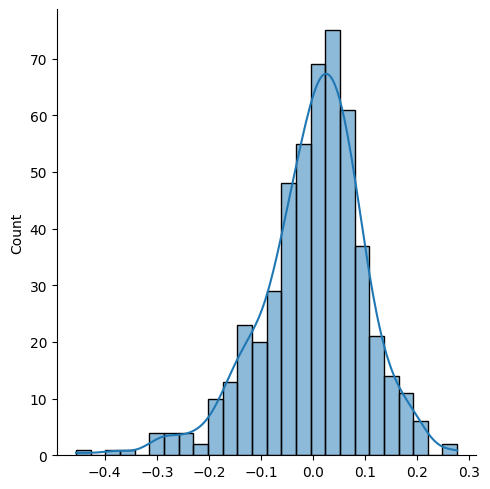

In [1440]:
plt.figure(figsize=(10, 6))
sns.displot(res, kde=True)
plt.show()

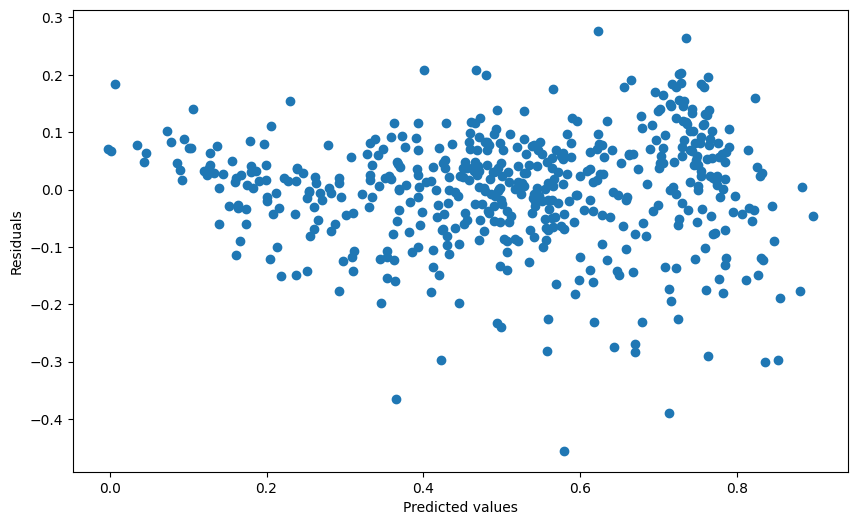

In [1441]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, res)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

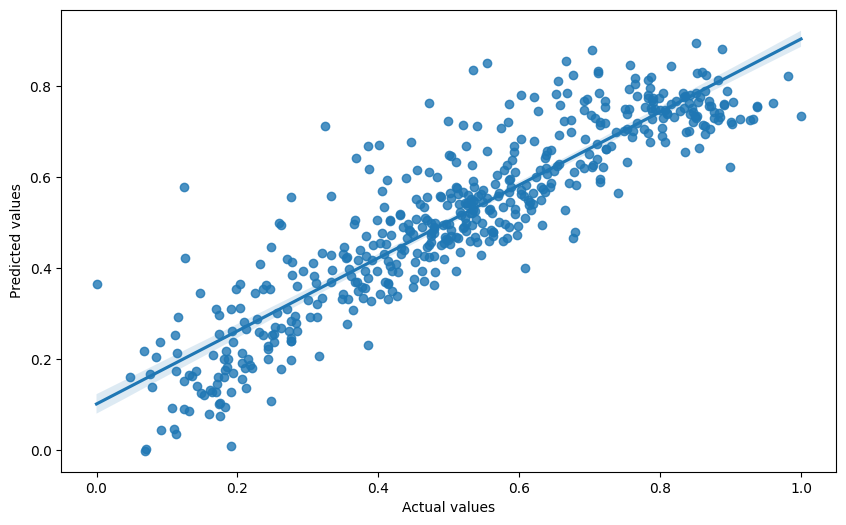

In [1442]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_train, y=y_train_pred)
plt.ylabel('Predicted values')
plt.xlabel('Actual values')
plt.show()

#### Model evaluation on test dataset.

In [1443]:
X_train_rfe = X_train_rfe.drop('const', axis=1)

In [1444]:

numric_vars = ['temp', 'humidity', 'windspeed', 'count']

df_test[numric_vars] = scaler.transform(df_test[numric_vars])

y_test = df_test.pop('count')
X_test = df_test

X_test_sm = X_test[X_train_rfe.columns]

X_test_sm = sm.add_constant(X_test_sm)

y_test_pred = sm_model.predict(X_test_sm)

y_test_pred.head()

184    0.460553
535    0.892319
299    0.457030
221    0.538952
152    0.554670
dtype: float64

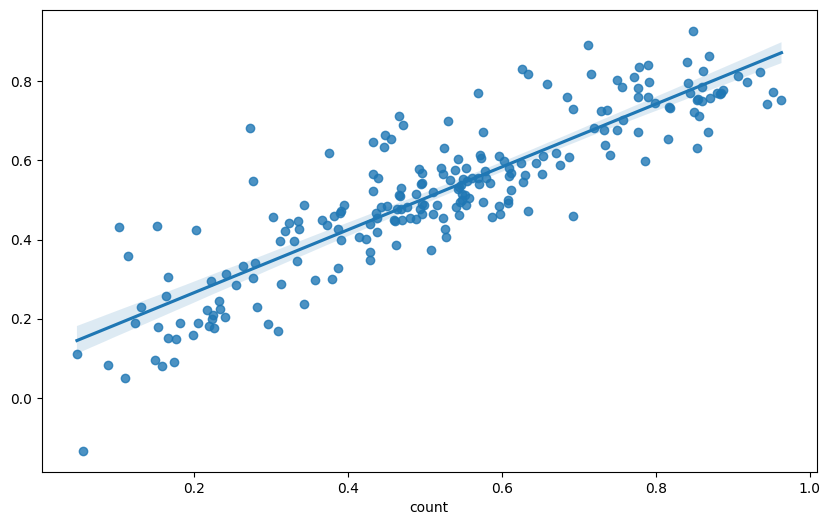

In [1445]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_test_pred)
plt.show()

In [1446]:
from sklearn.metrics import r2_score
test_r2_score = r2_score(y_test, y_test_pred)
train_r2_score = r2_score(y_train, y_train_pred)
print(test_r2_score)
print(train_r2_score)
print(train_r2_score - test_r2_score)

0.7724261538142667
0.8036118441406008
0.031185690326334115


Train Model R-Squared: 0.805

Test Model R-Squared: 0.774

Difference: 0.031

In [1447]:
coeffs = pd.DataFrame(sm_model.params, columns=['Coefficients'])
round(coeffs.sort_values(by='Coefficients', ascending=False), 2)

,Coefficients
temp,0.57
year,0.23
winter,0.13
Sep,0.09
const,0.09
summer,0.08
holiday,-0.09
windspeed,-0.15
Light Rain,-0.25
